##  First Initialise the API

In [1]:
gpt_api = "" ## Openai api
openrouter_api = "" ## openrouter api
Hugging_Face = "" # HF API

In [2]:
!pip uninstall -y datasets
!pip install datasets==2.16.1


Found existing installation: datasets 4.0.0
Uninstalling datasets-4.0.0:
  Successfully uninstalled datasets-4.0.0
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
  Attempting uninstall: dill
    Found existing installation: dill 0.3.8
    Uninstalling dill-0.3.8:
      Successfully uninstalled dill-0.3.8
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.16
    Uninstalling 

In [3]:
import huggingface_hub

huggingface_hub.login( token =  Hugging_Face, add_to_git_credential = False)

In [4]:
from datasets import load_dataset

ds = load_dataset("codeparrot/apps", split="train")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/datasets/load.py:1429: FutureWarning: The repository for codeparrot/apps contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/codeparrot/apps
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [5]:
import pandas as pd

df = pd.DataFrame(ds)
print(df.head())

   problem_id                                           question  \
0           0  Polycarp has $n$ different binary words. A wor...   
1           1  Mikhail walks on a Cartesian plane. He starts ...   
2           2  You are given three sequences: $a_1, a_2, \ldo...   
3           3  You have $n$ barrels lined up in a row, number...   
4           4  You are given a permutation $p=[p_1, p_2, \ldo...   

                                           solutions  \
0  ["for _ in range(int(input())):\n    n = int(i...   
1  ["q=int(input())\n\nfor e in range(q):\n    x,...   
2  ["import sys\nimport random\nfrom fractions im...   
3  ["def solve():\n    n, k = map(int,input().spl...   
4  ["for _ in range(int(input())):\n    input()\n...   

                                        input_output difficulty  \
0  {\n  "inputs": [\n    "4\n4\n0001\n1000\n0011\...  interview   
1  {\n  "inputs": [\n    "3\n2 2 3\n4 3 7\n10 1 9...  interview   
2  {\n  "inputs": [\n    "5\n3\n1 1 1\n2 2 2\n3 3... 

In [6]:
df.columns

Index(['problem_id', 'question', 'solutions', 'input_output', 'difficulty',
       'url', 'starter_code'],
      dtype='object')

# Number of rows to test

In [7]:
df = df.iloc[:15]

In [8]:
df.shape

(5, 7)

In [9]:
!pip install openai datasets matplotlib scikit-learn
!pip install codebleu[all]

!pip install tree-sitter-python==0.21

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.2/546.2 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.8/402.8 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.0/313.0 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.1/108.1 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.5/165.5 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.6/130.6 kB 10.2 MB/s eta 0:00:00
  Attempting uninstall: tree-sitter-py

In [15]:
#
import time
import logging
from openai import OpenAI  # or your client library
import warnings; warnings.filterwarnings("ignore")

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

client = OpenAI(
    api_key=gpt_api
)

def generate_code(prompt, model_name, max_retries=5):
    attempt = 0
    while attempt <= max_retries:
        try:
            if model_name == "gpt-4o-mini":
                response = client.chat.completions.create(
                    model=model_name,
                    messages=[
                        {
                            "role": "system",
                            "content": """You are a senior level Software developer, having advance skills in coding.
                                        Your task is to generate code based on user message. \n\n
                                        Note: Provide only the code and do not enclose it And Do Not ask for any input in code, use default values as per users prompt"""
                        },
                        {
                            "role": "user",
                            "content": prompt
                        }
                    ],
                    temperature=0.4,
                )
                return response.choices[0].message.content

            elif model_name == "meta-llama/llama-3.3-70b-instruct":
                client_mistral = OpenAI(
                                    base_url="https://openrouter.ai/api/v1",
                                    api_key=openrouter_api,
                                    )
                completion = client_mistral.chat.completions.create(
                    model="meta-llama/llama-3.3-70b-instruct",
                    messages=[
                        {"role": "system", "content": "You are a senior Python developer with advanced coding skills. Your task is to complete the implementation of the function based on the provided code prompt.\n\nFollow these rules strictly:\n1. Provide only the Python code inside the function; do not include the function signature, docstring, or any other part that is already present in the prompt.\n2. Do not enclose the code in markdown, comments, or explanations.\n3. The code must be executable and follow Python syntax conventions.\n4. Use 4 spaces per indentation level.\n5. Do not escape special characters unnecessarily (e.g., underscores should remain as '_').\n6. Do not add or modify docstrings, examples, or test cases; focus only on the function logic.\n7. Ensure the output code is clean, executable, and free of syntax errors. Note: Provide only the code and do not enclose it And Do Not ask for any input in code, use default values as per users prompt"}

,
                        {"role": "user", "content": f" ```{prompt}```"}
                    ],
                    temperature=0.4,
                )
                return completion.choices[0].message.content

            elif model_name == "x-ai/grok-3-mini":
                client_grok = OpenAI(
                                    base_url="https://openrouter.ai/api/v1",
                                    api_key=openrouter_api,
                                    )
                completion = client_grok.chat.completions.create(
                    model="x-ai/grok-3-mini",
                    messages=[
                        {"role": "system", "content": "You are a senior Python developer with advanced coding skills. Your task is to complete the implementation of the function based on the provided code prompt.\n\nFollow these rules strictly:\n1. Provide only the Python code inside the function; do not include the function signature, docstring, or any other part that is already present in the prompt.\n2. Do not enclose the code in markdown, comments, or explanations.\n3. The code must be executable and follow Python syntax conventions.\n4. Use 4 spaces per indentation level.\n5. Do not escape special characters unnecessarily (e.g., underscores should remain as '_').\n6. Do not add or modify docstrings, examples, or test cases; focus only on the function logic.\n7. Ensure the output code is clean, executable, and free of syntax errors. Note: Provide only the code and do not enclose it And Do Not ask for any input in code, use default values as per users prompt"}

,
                        {"role": "user", "content": f" ```{prompt}```"}
                    ],
                    temperature=0.4,
                )
                return completion.choices[0].message.content

            elif model_name == "google/gemini-2.0-flash-001":
                client_Gemini = OpenAI(
                                    base_url="https://openrouter.ai/api/v1",
                                    api_key=openrouter_api,
                                    )
                completion = client_Gemini.chat.completions.create(
                    model="google/gemini-2.0-flash-001",
                    messages=[
                        {"role": "system", "content": "You are a senior Python developer with advanced coding skills. Your task is to complete the implementation of the function based on the provided code prompt.\n\nFollow these rules strictly:\n1. Provide only the Python code inside the function; do not include the function signature, docstring, or any other part that is already present in the prompt.\n2. Do not enclose the code in markdown, comments, or explanations.\n3. The code must be executable and follow Python syntax conventions.\n4. Use 4 spaces per indentation level.\n5. Do not escape special characters unnecessarily (e.g., underscores should remain as '_').\n6. Do not add or modify docstrings, examples, or test cases; focus only on the function logic.\n7. Ensure the output code is clean, executable, and free of syntax errors. Note: Provide only the code and do not enclose it And Do Not ask for any input in code, use default values as per users prompt"}

,
                        {"role": "user", "content": f" ```{prompt}```"}
                    ],
                    temperature=0.4,
                )
                return completion.choices[0].message.content

            elif model_name == "perplexity/sonar":
                client_perplexity = OpenAI(
                                    base_url="https://openrouter.ai/api/v1",
                                    api_key=openrouter_api,
                                    )
                completion = client_perplexity.chat.completions.create(
                    model="perplexity/sonar",
                    messages=[
                        {"role": "system", "content": "You are a senior Python developer with advanced coding skills. Your task is to complete the implementation of the function based on the provided code prompt.\n\nFollow these rules strictly:\n1. Provide only the Python code inside the function; do not include the function signature, docstring, or any other part that is already present in the prompt.\n2. Do not enclose the code in markdown, comments, or explanations.\n3. The code must be executable and follow Python syntax conventions.\n4. Use 4 spaces per indentation level.\n5. Do not escape special characters unnecessarily (e.g., underscores should remain as '_').\n6. Do not add or modify docstrings, examples, or test cases; focus only on the function logic.\n7. Ensure the output code is clean, executable, and free of syntax errors. Note: Provide only the code and do not enclose it And Do Not ask for any input in code, use default values as per users prompt"}

,
                        {"role": "user", "content": f" ```{prompt}```"}
                    ],
                    temperature=0.4,
                )
                return completion.choices[0].message.content

        except Exception as e:
            attempt += 1
            wait_time = 2 ** attempt
            logging.error(f"Error on attempt {attempt}: {str(e)}. Retrying in {wait_time} seconds...")
            time.sleep(wait_time)

    logging.error("Max retries exceeded. Returning empty result.")
    return ""


In [11]:
import re
import ast
import json
from sklearn.metrics import f1_score
from codebleu import calc_codebleu
import io
import sys

def check_solution(model_code, test_cases):
    """
    test_cases: list of dicts with {"inputs": str, "outputs": str}
    """
    try:
        # Run for each test case
        for case in test_cases:
            inp_str = case["inputs"]
            expected_out = case["outputs"].strip()

            # Mock stdin with test input
            sys.stdin = io.StringIO(inp_str)

            # Capture stdout
            captured_output = io.StringIO()
            sys.stdout = captured_output

            # New namespace per run
            namespace = {}
            exec(model_code, namespace)

            # Reset stdout
            sys.stdout = sys.__stdout__

            # Compare
            actual_out = captured_output.getvalue().strip()
            if actual_out != expected_out:
                return False  # fail if any test doesn't match

        return True
    except Exception as e:
        sys.stdout = sys.__stdout__  # make sure stdout is restored
        return False


In [12]:
def compute_codebleu(reference, prediction):
    result = calc_codebleu([reference], [prediction], lang="python",
                           weights=(0.25, 0.25, 0.25, 0.25), tokenizer=None)
    return result["codebleu"]


def compute_f1(reference, prediction):
    ref_tokens = reference.replace("\n", " ").split()
    pred_tokens = prediction.replace("\n", " ").split()
    ref_set, pred_set = set(ref_tokens), set(pred_tokens)
    tp = len(ref_set & pred_set)
    fp = len(pred_set - ref_set)
    fn = len(ref_set - ref_set)
    precision = tp / (tp + fp + 1e-9)
    recall = tp / (tp + fn + 1e-9)
    f1 = 2 * precision * recall / (precision + recall + 1e-9)
    return f1

In [13]:
samples = df.to_dict(orient="records")


In [16]:
results = {
    "gpt-4o-mini": [],
    "meta-llama/llama-3.3-70b-instruct": [],
    "x-ai/grok-3-mini": [],
    "google/gemini-2.0-flash-001": [],
    "perplexity/sonar": []
}
generated_logs = {
    "gpt-4o-mini": [],
    "meta-llama/llama-3.3-70b-instruct": [],
    "x-ai/grok-3-mini": [],
    "google/gemini-2.0-flash-001": [],
    "perplexity/sonar": []
}

# Helper: build tests from input_output
def build_tests(io_str, func_name):
    try:
        io_data = json.loads(io_str)  # input_output in APPS is JSON string
    except:
        return []

    test_list = []
    return io_data
    for case in io_data:
        inp, out = cased["inputs"], cased["outputs"]
        test_list.append(f"assert {func_name}(*{inp}) == {out}")
    return test_list


# # Loop over models and dataset samples
for model in results.keys():
    for ex in samples:
        # Prompt
        prompt = ex["question"]
        if ex["starter_code"]:
            prompt += "\nStarter code:\n" + ex["starter_code"]

        # Generate model code
        model_code = generate_code(prompt, model)

        # Clean code block formatting
        model_code = re.sub(r"^```(?:python)?\s*", "", model_code.strip(),
                            flags=re.IGNORECASE | re.MULTILINE)
        model_code = re.sub(r"```$", "", model_code.strip())
        generated_logs[model].append(model_code)

        # Reference solution (pick the first one)
        reference_code = ex["solutions"][0] if isinstance(ex["solutions"], list) else ex["solutions"]

        # Build tests
        # We assume function name from starter code or solution (you can refine this)
        func_name_match = re.search(r"def (\w+)\(", reference_code)
        func_name = func_name_match.group(1) if func_name_match else "solution"
        test_list = build_tests(ex["input_output"], func_name)

        # Check solution
        passed = check_solution(model_code, test_list)

        # Compute metrics
        metrics = {
            "problem_id": ex["problem_id"],
            "pass@1": int(passed),
            "codebleu": compute_codebleu(reference_code, model_code),
            "f1": compute_f1(reference_code, model_code),
            "difficulty": ex["difficulty"]
        }

        results[model].append(metrics)
    print(model)

print("Done benchmarking!")

In [17]:
results

{'gpt-4o-mini': [{'problem_id': 0,
   'pass@1': 0,
   'codebleu': 0.2508122754715112,
   'f1': 0.26966292110895085,
   'difficulty': 'interview'},
  {'problem_id': 1,
   'pass@1': 0,
   'codebleu': 0.2507916702772271,
   'f1': 0.4615384611745562,
   'difficulty': 'interview'},
  {'problem_id': 2,
   'pass@1': 0,
   'codebleu': 0.2543743319170849,
   'f1': 0.42307692273520703,
   'difficulty': 'interview'},
  {'problem_id': 3,
   'pass@1': 0,
   'codebleu': 0.25157761364400494,
   'f1': 0.3703703700594421,
   'difficulty': 'interview'},
  {'problem_id': 4,
   'pass@1': 0,
   'codebleu': 0.2507270477569281,
   'f1': 0.6086956517328292,
   'difficulty': 'interview'}],
 'meta-llama/llama-3.3-70b-instruct': [{'problem_id': 0,
   'pass@1': 0,
   'codebleu': 0.2518745542941893,
   'f1': 0.5249999995996875,
   'difficulty': 'interview'},
  {'problem_id': 1,
   'pass@1': 0,
   'codebleu': 0.2525322280407355,
   'f1': 0.7368421047719298,
   'difficulty': 'interview'},
  {'problem_id': 2,
   'pas

In [19]:
import numpy as np

summary = {}
for model, metrics in results.items():
    pass1 = np.mean([m["pass@1"] for m in metrics])
    cb = np.mean([m["codebleu"] for m in metrics])
    f1 = np.mean([m["f1"] for m in metrics])
    avg = np.mean([pass1, cb, f1])  # overall average for the model

    summary[model] = {
        "Pass@1": pass1,
        "CodeBLEU": cb,
        "F1": f1,
        "Average": avg
    }

summary


{'gpt-4o-mini': {'Pass@1': np.float64(0.0),
  'CodeBLEU': np.float64(0.25165658781335126),
  'F1': np.float64(0.4266688653621971),
  'Average': np.float64(0.22610848439184947)},
 'meta-llama/llama-3.3-70b-instruct': {'Pass@1': np.float64(0.0),
  'CodeBLEU': np.float64(0.2526472691465493),
  'F1': np.float64(0.6663614240802295),
  'Average': np.float64(0.3063362310755929)},
 'x-ai/grok-3-mini': {'Pass@1': np.float64(0.0),
  'CodeBLEU': np.float64(0.25226221824864614),
  'F1': np.float64(0.6140407249686182),
  'Average': np.float64(0.2887676477390881)},
 'google/gemini-2.0-flash-001': {'Pass@1': np.float64(0.0),
  'CodeBLEU': np.float64(0.25204601658885084),
  'F1': np.float64(0.6096715901755908),
  'Average': np.float64(0.28723920225481386)},
 'perplexity/sonar': {'Pass@1': np.float64(0.0),
  'CodeBLEU': np.float64(0.2533362600919455),
  'F1': np.float64(0.5113022998087235),
  'Average': np.float64(0.2548795199668897)}}

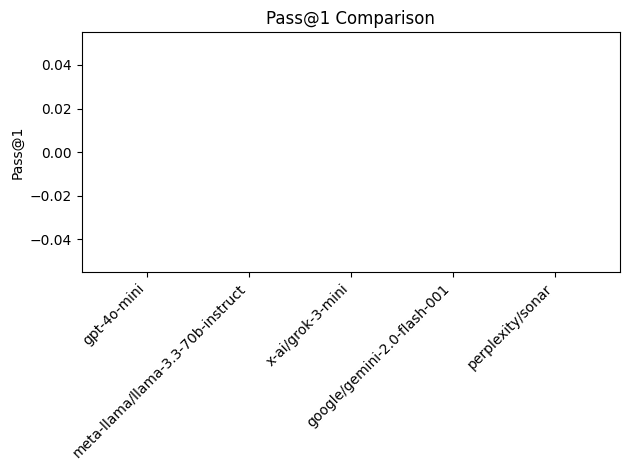

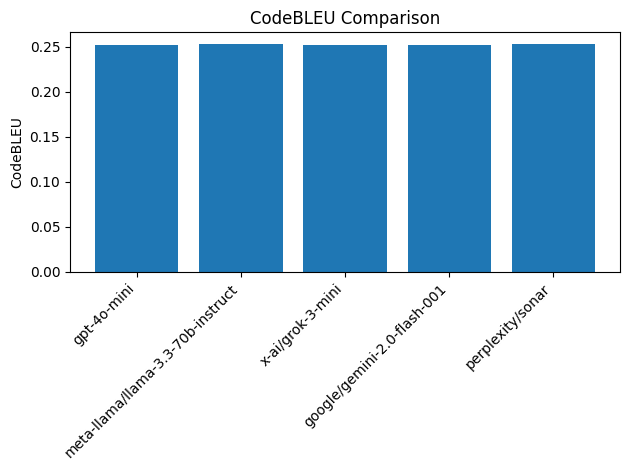

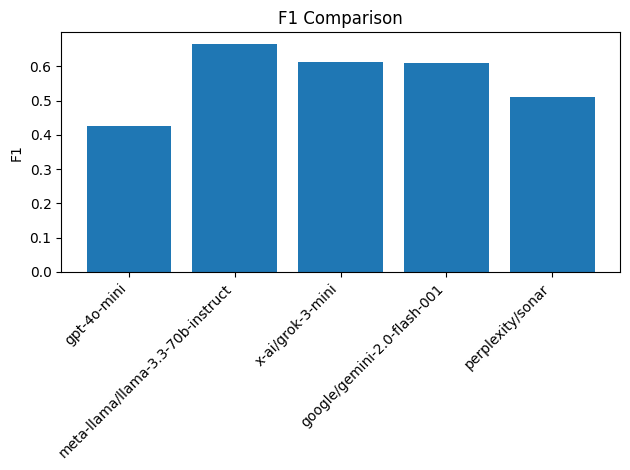

In [20]:
import matplotlib.pyplot as plt

metrics = ["Pass@1", "CodeBLEU", "F1"]
models = ["gpt-4o-mini",
          "meta-llama/llama-3.3-70b-instruct",
          "x-ai/grok-3-mini",
          "google/gemini-2.0-flash-001",
          "perplexity/sonar"]

for metric in metrics:
    values = [summary[m][metric] for m in models]

    plt.bar(models, values)
    plt.title(metric + " Comparison")
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha="right")  # rotate labels 45° and align right
    plt.tight_layout()                   # prevent cutoff
    plt.show()


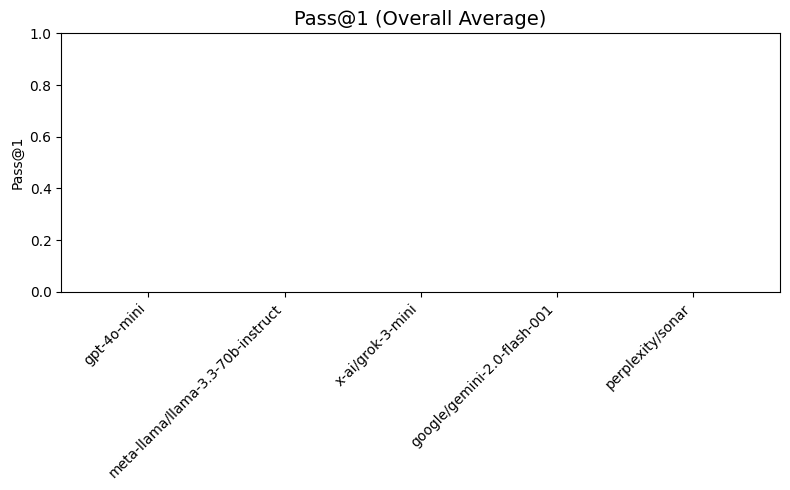

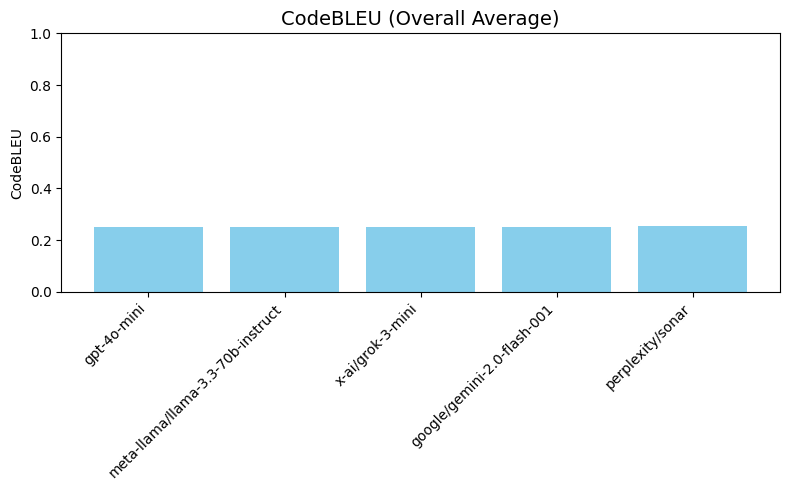

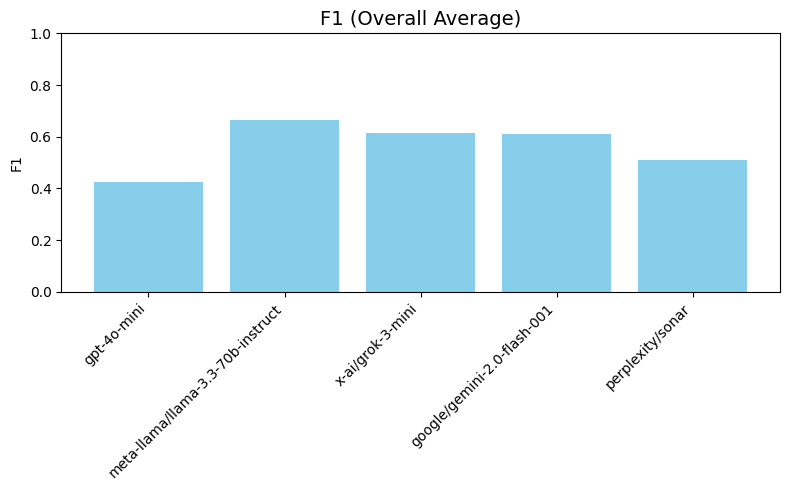

In [21]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ["Pass@1", "CodeBLEU", "F1"]
models = [
    "gpt-4o-mini",
    "meta-llama/llama-3.3-70b-instruct",
    "x-ai/grok-3-mini",
    "google/gemini-2.0-flash-001",
    "perplexity/sonar"
]

for metric in metrics:
    values = [summary[m][metric] for m in models]
    plt.figure(figsize=(8,5))
    plt.bar(models, values, color="skyblue")

    plt.title(f"{metric} (Overall Average)", fontsize=14)
    plt.ylabel(metric)
    plt.ylim(0,1)  # since most metrics are between 0–1
    plt.xticks(rotation=45, ha="right")  # rotate labels

    plt.tight_layout()  # prevent cutoff
    plt.show()



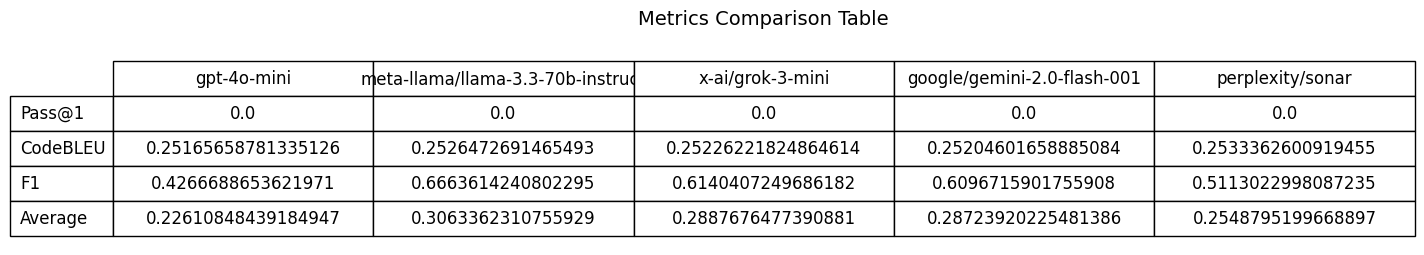

In [22]:
metricss = ["Pass@1", "CodeBLEU", "F1", "Average"]
modelss = [
    "gpt-4o-mini",
    "meta-llama/llama-3.3-70b-instruct",
    "x-ai/grok-3-mini",
    "google/gemini-2.0-flash-001",
    "perplexity/sonar"
]

fig, ax = plt.subplots(figsize=(8, 2.5))
ax.axis('off')

# Include the "Average" row from summary
table_data = [[summary[model][metric] for model in modelss] for metric in metricss]

table = ax.table(cellText=table_data,
                 rowLabels=metricss,
                 colLabels=modelss,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2.1, 2.1)

plt.title("Metrics Comparison Table", fontsize=14, pad=20)
plt.show()


In [23]:
best_model = max(summary.items(), key=lambda x: x[1]["Average"])
print(f"Best Model: {best_model[0]}")
print(f"Average Score: {best_model[1]['Average']:.4f}")


In [24]:
# Save JSON
with open("result_Apps.json", "w") as f:
    json.dump(results, f, indent=4)


print("Downloaded result_Apps.json to your local machine.")

In [25]:
# Save JSON
with open("generated_code_apps.json", "w") as f:
    json.dump(generated_logs, f, indent=4)


print("Downloaded generated_code_apps.json to your local machine.")